In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the Titanic dataset
titanic = pd.read_csv(r"D:\downloads\CSI'24\titanic.csv")

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Check for missing values
missing_values = titanic.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Handle Missing Values

In [32]:
# 1. Impute missing 'Age' values with the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\dines\AppData\Local\Temp\ipykernel_17308\3694757581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [33]:
# 2. Drop the 'Cabin' column due to many missing values
titanic.drop('Cabin', axis=1, inplace=True)

In [34]:
# 3. Impute missing 'Embarked' values with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

C:\Users\dines\AppData\Local\Temp\ipykernel_17308\901824478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [35]:
# 4. Impute missing 'Fare' values with the median
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

C:\Users\dines\AppData\Local\Temp\ipykernel_17308\3827591631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)


### Convert Categorical Features

In [36]:
# Convert 'Sex' into binary values (0 for male, 1 for female)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [37]:
# One-hot encode 'Embarked'
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

### Feature Engineering

In [38]:
# Create a 'FamilySize' feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [39]:
# Extract titles from 'Name'
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                              'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
titanic['Title'] = titanic['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5})
titanic['Title'] = titanic['Title'].fillna(0)

In [40]:
# Drop the 'Name' and 'Ticket' columns
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)

### Scaling and Normalization

In [41]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

In [42]:
# Scale 'Age' and 'Fare'
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

### Dropping Irrelevant Features

In [43]:
# Drop 'PassengerId' as it's not useful for prediction
titanic.drop('PassengerId', axis=1, inplace=True)

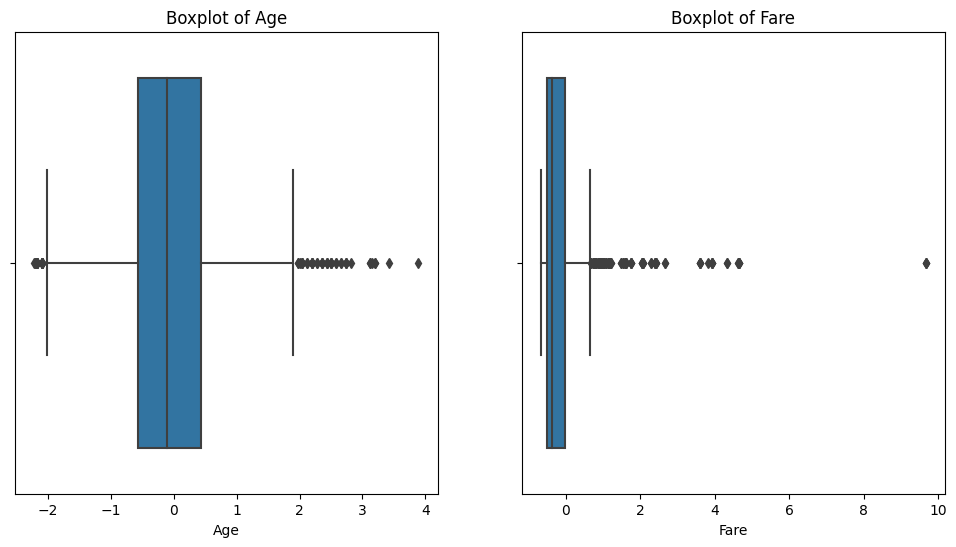

In [44]:

# Identifying Outliers using Box Plots

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=titanic['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=titanic['Fare'])
plt.title('Boxplot of Fare')

plt.show()

### Identifying Outliers using IQR (Interquartile Range) Method

In [45]:
# Calculate IQR for 'Age' and 'Fare'
Q1_age = titanic['Age'].quantile(0.25)
Q3_age = titanic['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_fare = titanic['Fare'].quantile(0.25)
Q3_fare = titanic['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

In [46]:
# Define thresholds for outliers
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

lower_fare = Q1_fare - 1.5 * IQR_fare
upper_fare = Q3_fare + 1.5 * IQR_fare

In [47]:
# Find outliers
outliers_age = titanic[(titanic['Age'] < lower_age) | (titanic['Age'] > upper_age)]
outliers_fare = titanic[(titanic['Fare'] < lower_fare) | (titanic['Fare'] > upper_fare)]

print(f'Outliers in Age: {len(outliers_age)}')
print(f'Outliers in Fare: {len(outliers_fare)}')

Outliers in Age: 66
Outliers in Fare: 116


### Handling Outliers

In [48]:
#Remove Outliers
titanic = titanic[(titanic['Age'] >= lower_age) & (titanic['Age'] <= upper_age)]
titanic = titanic[(titanic['Fare'] >= lower_fare) & (titanic['Fare'] <= upper_fare)]

### Splitting the Data

In [49]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nPreprocessing and Feature Engineering Completed!")


Preprocessing and Feature Engineering Completed!
